In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv('train_clean.csv')

In [3]:
train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0


In [4]:
train.isnull()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,True,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,True,False,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

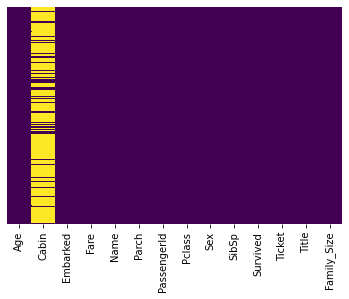

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis',cbar=False)
#missing data

<AxesSubplot:xlabel='Survived', ylabel='count'>

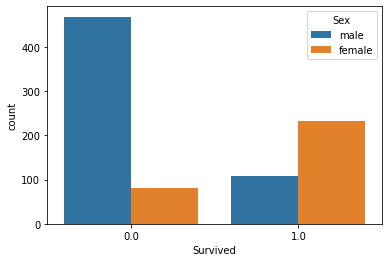

In [6]:
sns.countplot(x='Survived',data=train,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

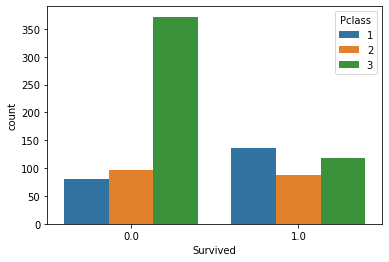

In [7]:
sns.countplot(x='Survived',data=train,hue='Pclass')

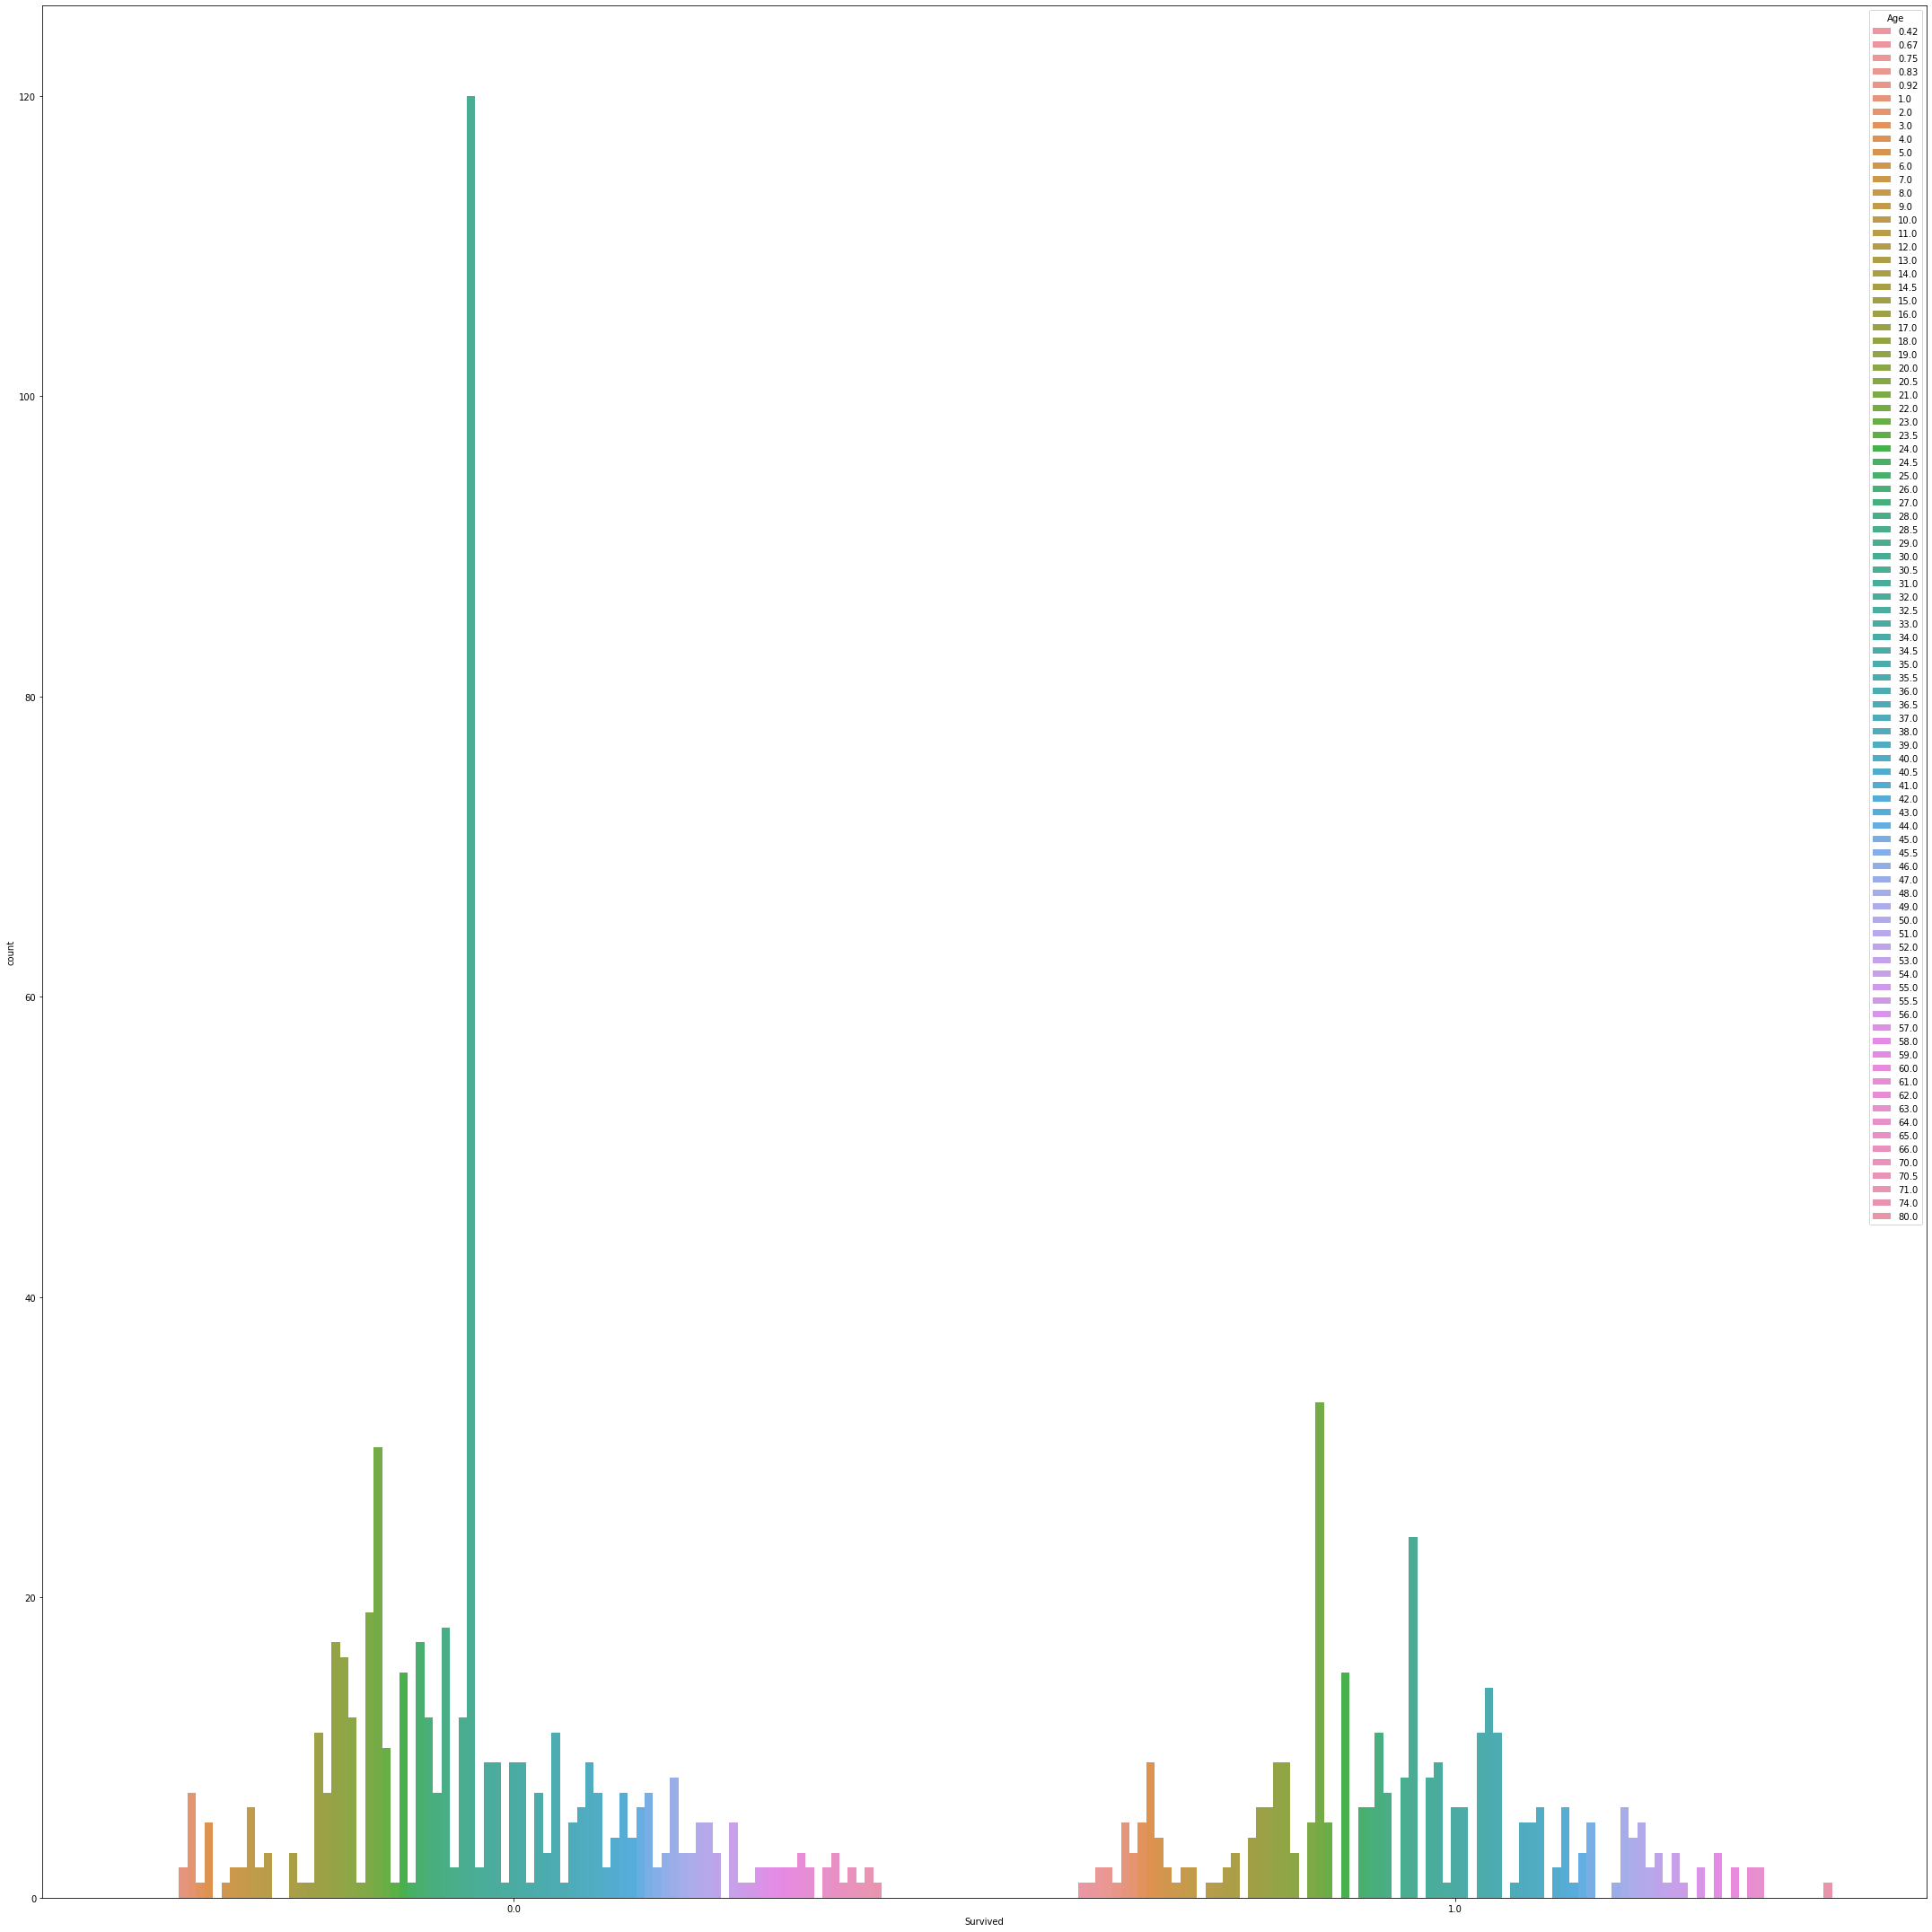

In [8]:
f=plt.figure(figsize=(30,30))
sns.countplot(x='Survived',data=train,hue='Age')
plt.tight_layout()

<AxesSubplot:xlabel='Age'>

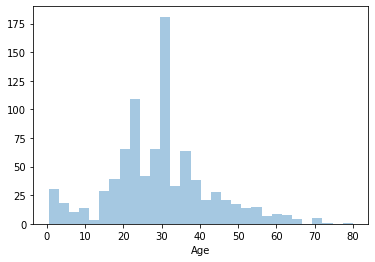

In [9]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

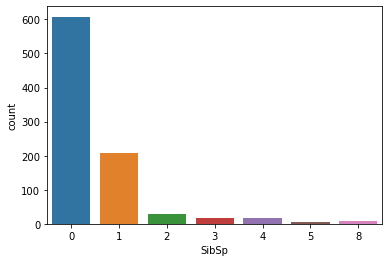

In [10]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

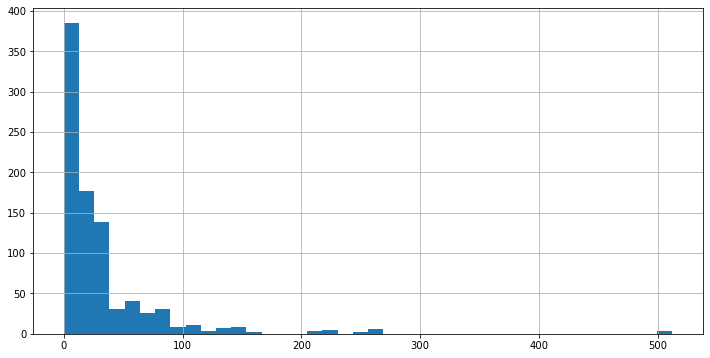

In [11]:
train['Fare'].hist(bins=40,figsize=(12,6))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

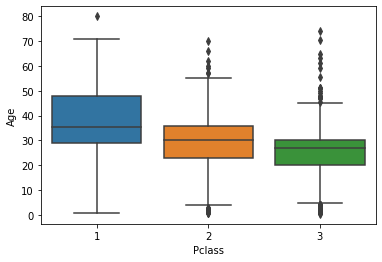

In [12]:
sns.boxplot(x='Pclass',y='Age',data=train)
#older =>rich=>1st class

In [13]:
train.drop(['Cabin'],axis=1,inplace=True)

<AxesSubplot:>

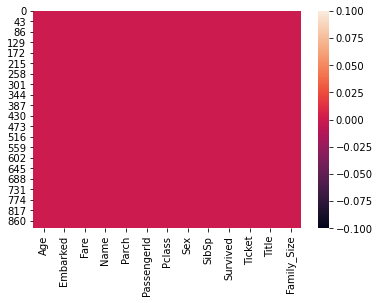

In [14]:
sns.heatmap(train.isnull())
#no missing values

In [15]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [16]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [17]:
train=pd.concat([train,sex,embark],axis=1)

In [18]:
train.head(10)

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size,male,Q,S
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1,1,0,1
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1,0,0,0
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0,0,0,1
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1,0,0,1
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0,1,0,1
5,30.0,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,Mr,0,1,1,0
6,54.0,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,Mr,0,1,0,1
7,2.0,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,Master,4,1,0,1
8,27.0,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,Mrs,2,0,0,1
9,14.0,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Mrs,1,0,0,0


In [19]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [20]:
train.drop(['Title'],axis=1,inplace=True)

In [21]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [22]:
train.head(2)

,Age,Fare,Parch,Pclass,SibSp,Survived,Family_Size,male,Q,S
0,22.0,7.2500,0,3,1,0.0,1,1,0,1
1,38.0,71.2833,0,1,1,1.0,1,0,0,0


In [23]:
y=train['Survived']

In [24]:
X=train.drop(['Survived'],axis=1)

In [25]:
X.head(2)

,Age,Fare,Parch,Pclass,SibSp,Family_Size,male,Q,S
0,22.0,7.2500,0,3,1,1,1,0,1
1,38.0,71.2833,0,1,1,1,0,0,0


In [26]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [27]:
pip install -U scikit-learn scipy matplotlib


Requirement already up-to-date: scikit-learn in c:\users\chaku\appdata\local\programs\python\python38-32\lib\site-packages (0.23.1)
Requirement already up-to-date: scipy in c:\users\chaku\appdata\local\programs\python\python38-32\lib\site-packages (1.5.1)
Requirement already up-to-date: matplotlib in c:\users\chaku\appdata\local\programs\python\python38-32\lib\site-packages (3.3.0)



In [28]:
from sklearn.model_selection import train_test_split


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model=LogisticRegression()

In [32]:
model.fit(X_train,y_train)

c:\users\chaku\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
pred=model.predict(X_test)

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82       169
         1.0       0.79      0.68      0.73       126

    accuracy                           0.79       295
   macro avg       0.79      0.77      0.78       295
weighted avg       0.79      0.79      0.78       295



In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_test,pred)

array([[146,  23],
       [ 40,  86]], dtype=int64)

In [38]:
t1=train
t1

,Age,Fare,Parch,Pclass,SibSp,Survived,Family_Size,male,Q,S
0,22.0,7.2500,0,3,1,0.0,1,1,0,1
1,38.0,71.2833,0,1,1,1.0,1,0,0,0
2,26.0,7.9250,0,3,0,1.0,0,0,0,1
3,35.0,53.1000,0,1,1,1.0,1,0,0,1
4,35.0,8.0500,0,3,0,0.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,2,0,0.0,0,1,0,1
887,19.0,30.0000,0,1,0,1.0,0,0,0,1
888,22.0,23.4500,2,3,1,0.0,3,0,0,1
889,26.0,30.0000,0,1,0,1.0,0,1,0,0


In [39]:
Pc=pd.get_dummies(t1['Pclass'],drop_first=True)

In [40]:
Pc

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [41]:
t1=pd.concat([t1,Pc],axis=1)

In [42]:
t1

,Age,Fare,Parch,Pclass,SibSp,Survived,Family_Size,male,Q,S,2,3
0,22.0,7.2500,0,3,1,0.0,1,1,0,1,0,1
1,38.0,71.2833,0,1,1,1.0,1,0,0,0,0,0
2,26.0,7.9250,0,3,0,1.0,0,0,0,1,0,1
3,35.0,53.1000,0,1,1,1.0,1,0,0,1,0,0
4,35.0,8.0500,0,3,0,0.0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,2,0,0.0,0,1,0,1,1,0
887,19.0,30.0000,0,1,0,1.0,0,0,0,1,0,0
888,22.0,23.4500,2,3,1,0.0,3,0,0,1,0,1
889,26.0,30.0000,0,1,0,1.0,0,1,0,0,0,0


In [43]:
t1.drop(['Pclass'],axis=1,inplace=True)

In [44]:
t1

,Age,Fare,Parch,SibSp,Survived,Family_Size,male,Q,S,2,3
0,22.0,7.2500,0,1,0.0,1,1,0,1,0,1
1,38.0,71.2833,0,1,1.0,1,0,0,0,0,0
2,26.0,7.9250,0,0,1.0,0,0,0,1,0,1
3,35.0,53.1000,0,1,1.0,1,0,0,1,0,0
4,35.0,8.0500,0,0,0.0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,0,0.0,0,1,0,1,1,0
887,19.0,30.0000,0,0,1.0,0,0,0,1,0,0
888,22.0,23.4500,2,1,0.0,3,0,0,1,0,1
889,26.0,30.0000,0,0,1.0,0,1,0,0,0,0


In [45]:
X1=t1

In [46]:
y1=t1['Survived']

In [47]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=101)

In [48]:
m1=LogisticRegression()

In [49]:
m1.fit(X_train1,y_train1)

c:\users\chaku\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
pre=m1.predict(X_test1)

In [51]:
confusion_matrix(y_test1,pre)

array([[169,   0],
       [  0, 126]], dtype=int64)

In [52]:
print(classification_report(y_test1,pre))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       169
         1.0       1.00      1.00      1.00       126

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295

